In [1]:
from __future__ import print_function

"""
A reference implementation of cavity quantum electrodynamics 
configuration interactions singles.
"""

__authors__   = ["Jon McTague", "Jonathan Foley"]
__credits__   = ["Jon McTague", "Jonathan Foley"]

__copyright_amp__ = "(c) 2014-2018, The Psi4NumPy Developers"
__license__   = "BSD-3-Clause"
__date__      = "2021-01-15"

# ==> Import Psi4, NumPy, & SciPy <==
import psi4
import numpy as np
import scipy.linalg as la
import time
from helper_cqed_rhf import *
from helper_cis import *
from helper_cs_cqed_cis import *
from psi4.driver.procrouting.response.scf_response import tdscf_excitations

# Set Psi4 & NumPy Memory Options
psi4.set_memory('2 GB')
#psi4.core.set_output_file('output.dat', False)

numpy_memory = 2


In [2]:
from matplotlib import pyplot as plt

molstr = """

0 1
O 0.0000000000 0.0000000000 5.91268220e-01
C 0.0000000000 0.0000000000 -5.90400099e-01
H 0.0000000000 9.32184336e-01 -1.17703144e+00
H 0.0000000000 -9.32184336e-01 -1.17703144e+00
no_reorient
symmetry c1
"""

# options dict
options_dict = {'basis': 'cc-pVDZ',
               'save_jk': True, 
               'scf_type': 'pk',
               'e_convergence' : 1e-7,
               'd_convergence' : 1e-6}

# set psi4 options and geometry
psi4.set_options(options_dict)
#mol = psi4.geometry(mol_t)

l = 0.05
lam_yz = np.array([0, l/np.sqrt(2), l/np.sqrt(2)])
cqed_dict = cqed_rhf(lam_y, molstr, options_dict)

print(cqed_dict['RHF DIPOLE MOMENT'])
print(cqed_dict['CQED-RHF DIPOLE MOMENT'])

NameError: name 'lam_y' is not defined

In [ ]:

l_mag = np.array([0., 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2])

# array for ordinary cis
cqed_rhf_energy_array = np.zeros((24,len(l_mag)))


# loop over the different bond-lengths, create different instances
# of MgH+ molecule and compute and store various quantities
ctr = 0
for l in l_mag:
    lam_y = np.array([0, l, 0])
    lam_z = np.array([0, 0, l])
    lam_yz = np.array([0, l/np.sqrt(2), l/np.sqrt(2)])
    
    cqed_dict = cqed_rhf(lam_y, molstr, options_dict)
    
    # get cqed-rhf energy
    cqed_rhf_energy_array[0,ctr] = cqed_dict['CQED-RHF ENERGY']
    cqed_rhf_energy_array[1,ctr] = cqed_dict['1E ENERGY']
    cqed_rhf_energy_array[2,ctr] = cqed_dict['2E ENERGY']
    cqed_rhf_energy_array[3,ctr] = cqed_dict['1E DIPOLE ENERGY']
    cqed_rhf_energy_array[4,ctr] = cqed_dict['1E QUADRUPOLE ENERGY']
    cqed_rhf_energy_array[5,ctr] = cqed_dict['2E DIPOLE ENERGY']
    cqed_rhf_energy_array[6,ctr] = cqed_dict['DIPOLE ENERGY']
    cqed_rhf_energy_array[7,ctr] = cqed_dict['NUCLEAR REPULSION ENERGY']
    if ctr>0:
        cqed_dict = cqed_rhf(lam_z, molstr, options_dict)
        cqed_rhf_energy_array[8,ctr] = cqed_dict['CQED-RHF ENERGY']
        cqed_rhf_energy_array[9,ctr] = cqed_dict['1E ENERGY']
        cqed_rhf_energy_array[10,ctr] = cqed_dict['2E ENERGY']
        cqed_rhf_energy_array[11,ctr] = cqed_dict['1E DIPOLE ENERGY']
        cqed_rhf_energy_array[12,ctr] = cqed_dict['1E QUADRUPOLE ENERGY']
        cqed_rhf_energy_array[13,ctr] = cqed_dict['2E DIPOLE ENERGY']
        cqed_rhf_energy_array[14,ctr] = cqed_dict['DIPOLE ENERGY']
        cqed_rhf_energy_array[15,ctr] = cqed_dict['NUCLEAR REPULSION ENERGY']
        cqed_dict = cqed_rhf(lam_yz, molstr, options_dict)
        cqed_rhf_energy_array[16,ctr] = cqed_dict['CQED-RHF ENERGY']
        cqed_rhf_energy_array[17,ctr] = cqed_dict['1E ENERGY']
        cqed_rhf_energy_array[18,ctr] = cqed_dict['2E ENERGY']
        cqed_rhf_energy_array[19,ctr] = cqed_dict['1E DIPOLE ENERGY']
        cqed_rhf_energy_array[20,ctr] = cqed_dict['1E QUADRUPOLE ENERGY']
        cqed_rhf_energy_array[21,ctr] = cqed_dict['2E DIPOLE ENERGY']
        cqed_rhf_energy_array[22,ctr] = cqed_dict['DIPOLE ENERGY']
        cqed_rhf_energy_array[23,ctr] = cqed_dict['NUCLEAR REPULSION ENERGY']
    
    ctr+=1
    


In [8]:
cqed_rhf_energy_array[0:8,0]
cqed_rhf_energy_array[8:16,0] = cqed_rhf_energy_array[0:8,0]
cqed_rhf_energy_array[16:24,0] = cqed_rhf_energy_array[0:8,0]

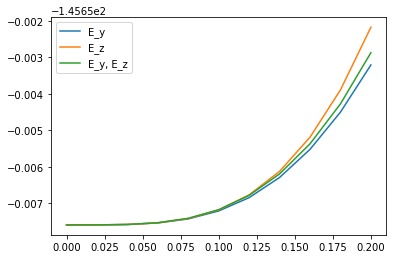

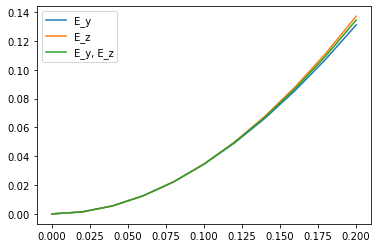

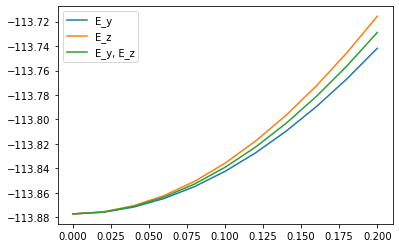

In [29]:
plt.plot(l_mag, cqed_rhf_energy_array[1,:]+cqed_rhf_energy_array[2,:], label="E_y" )
plt.plot(l_mag, cqed_rhf_energy_array[9,:]+cqed_rhf_energy_array[10,:], label="E_z" )
plt.plot(l_mag, cqed_rhf_energy_array[17,:]+cqed_rhf_energy_array[18,:], label="E_y, E_z" )
plt.legend()
plt.show()

plt.plot(l_mag, cqed_rhf_energy_array[3,:]+cqed_rhf_energy_array[4,:]+cqed_rhf_energy_array[5,:], label="E_y" )
plt.plot(l_mag, cqed_rhf_energy_array[11,:]+cqed_rhf_energy_array[12,:]+cqed_rhf_energy_array[13,:], label="E_z" )
plt.plot(l_mag, cqed_rhf_energy_array[19,:]+cqed_rhf_energy_array[20,:]+cqed_rhf_energy_array[21,:], label="E_y, E_z" )
plt.legend()
plt.show()

plt.plot(l_mag, cqed_rhf_energy_array[0,:], label="E_y" )
plt.plot(l_mag, cqed_rhf_energy_array[8,:], label="E_z" )
plt.plot(l_mag, cqed_rhf_energy_array[16,:], label="E_y, E_z" )
plt.legend()
plt.show()

In [30]:
f = open('Formaldehyde_ccpVDZ_variable_L.txt', 'w')
stri = "lmag; ly E_rhf, ly E1e, ly E2e, ly E1de, ly E1qe, ly E2de, ly de, ly nuc, lz E_rhf, lz E1e, lz E2e, lz E1de, lz E1qe, lz E2de, lz de, lz nuc, lyz E_rhf, lyz E1e, lyz E2e, lyz E1de, lyz E1qe, lyz E2de, lyz de, lyz nuc"
f.write(" %s \n" % stri)
ctr=0
for l in l_mag:
    f.write("%6.3f %12.6f %12.6f %12.6f %12.6f %12.6f %12.6f %12.6f %12.6f %12.6f %12.6f %12.6f %12.6f %12.6f %12.6f %12.6f %12.6f %12.6f %12.6f %12.6f %12.6f %12.6f %12.6f %12.6f %12.6f \n" % 
            (l, cqed_rhf_energy_array[0,ctr], cqed_rhf_energy_array[1,ctr],cqed_rhf_energy_array[2,ctr],cqed_rhf_energy_array[3,ctr],
                cqed_rhf_energy_array[4,ctr], cqed_rhf_energy_array[5,ctr],cqed_rhf_energy_array[6,ctr],cqed_rhf_energy_array[7,ctr],
                cqed_rhf_energy_array[8,ctr], cqed_rhf_energy_array[9,ctr],cqed_rhf_energy_array[10,ctr],cqed_rhf_energy_array[11,ctr],
                cqed_rhf_energy_array[12,ctr], cqed_rhf_energy_array[13,ctr],cqed_rhf_energy_array[14,ctr],cqed_rhf_energy_array[15,ctr],
                cqed_rhf_energy_array[16,ctr], cqed_rhf_energy_array[17,ctr],cqed_rhf_energy_array[18,ctr],cqed_rhf_energy_array[19,ctr],
                cqed_rhf_energy_array[20,ctr], cqed_rhf_energy_array[21,ctr],cqed_rhf_energy_array[22,ctr],cqed_rhf_energy_array[23,ctr]))
    ctr += 1
    
f.close()